In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from LoadData import load_data
from sklearn.model_selection import train_test_split

seq_len = 16
X, Y = load_data(sequence_len=seq_len)

# 5. Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [3]:
Y.shape

(35024, 16, 1)

In [4]:
from RecurrentLayerTypes import RecurrentLayerTypes
from RecurentNeuralNetworkGraph import RecurentNeuralNetworkGraph

epoch = 20
arch = [X.shape[2], 16, 1]
lstm_test = RecurentNeuralNetworkGraph(arch, RecurrentLayerTypes.LSTMgr, seq_len , 24e-3)

In [5]:
loss_lstm_test = lstm_test.fit(X_train, y_train, epoch_count=epoch)

100%|██████████| 20/20 [03:22<00:00, 10.14s/it]


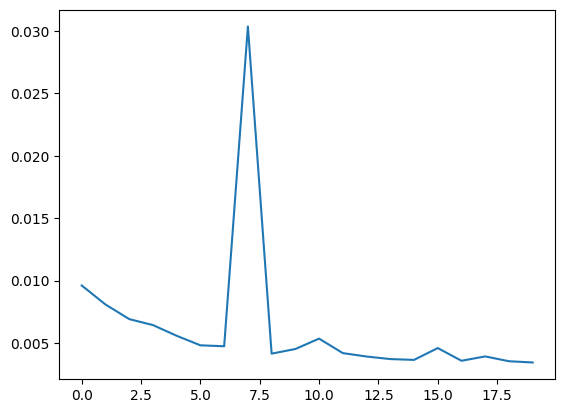

loss[-1]=0.0034324954347379655


In [6]:
plt.plot(loss_lstm_test)
plt.show()
print(f"loss[-1]={loss_lstm_test[-1]}")

In [7]:
# epoch = 20
# arch = [X.shape[2], 16, 1]
gru_test = RecurentNeuralNetworkGraph(arch, RecurrentLayerTypes.GRUgr, seq_len, 12e-3)

In [8]:
import cProfile
# cProfile.run("gru_test.fit(X_train, y_train, epoch_count=epoch)", sort="cumtime")
loss_gru_test = gru_test.fit(X_train, y_train, epoch_count=epoch)

100%|██████████| 20/20 [02:58<00:00,  8.92s/it]


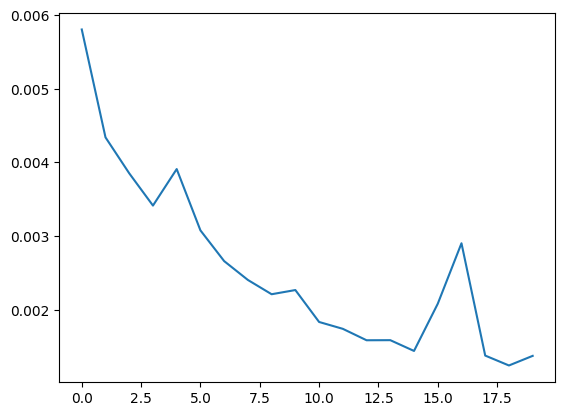

loss[-1]=0.001374400387982377


In [9]:
plt.plot(loss_gru_test)
plt.show()
print(f"loss[-1]={loss_gru_test[-1]}")

In [10]:
from RecurentNeuralNetwork import RecurentNeuralNetwork
from RecurrentLayerTypes import RecurrentLayerTypes
from RecurentNeuralNetworkGraph import RecurentNeuralNetworkGraph

epoch = 20
arch = [X.shape[2], 16, 1]
rnn_test = RecurentNeuralNetworkGraph(arch, RecurrentLayerTypes.RNN, seq_len , 6e-3)

In [11]:
loss_rnn_test = rnn_test.fit(X_train, y_train, epoch_count=epoch)

100%|██████████| 20/20 [00:47<00:00,  2.36s/it]


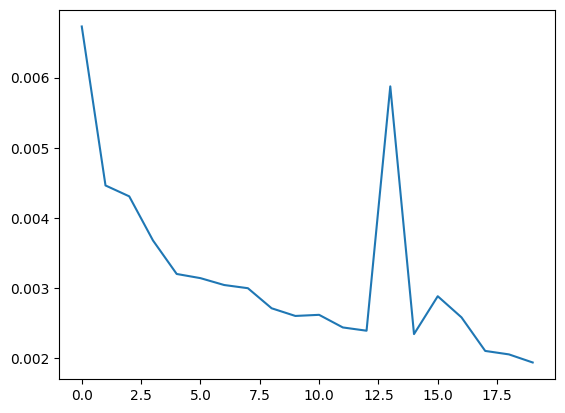

loss[-1]=0.0019411476924172959


In [12]:
plt.plot(loss_rnn_test)
plt.show()
print(f"loss[-1]={loss_rnn_test[-1]}")

In [13]:
from RecurentNeuralNetwork import RecurentNeuralNetwork
from RecurrentLayerTypes import RecurrentLayerTypes

epoch = 20
arch = [X.shape[2], 16, 1]
rnn = RecurentNeuralNetwork(arch, RecurrentLayerTypes.RNNSIMPLE, seq_len , 6e-3)

In [14]:
loss = rnn.fit(X_train, y_train, epoch_count=epoch)

100%|██████████| 20/20 [00:40<00:00,  2.01s/it]


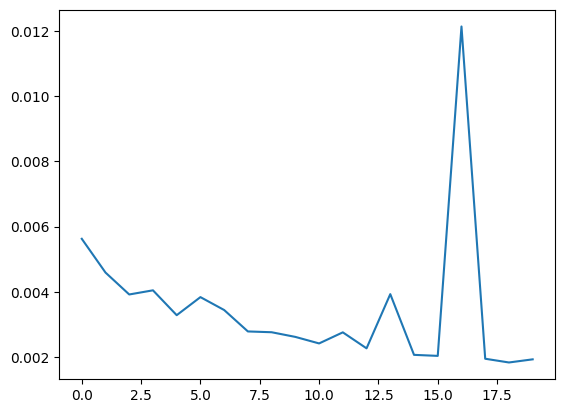

loss[-1]=0.0019249676591241377


In [15]:
plt.plot(loss)
plt.show()
print(f"loss[-1]={loss[-1]}")

In [16]:
test_predict = rnn.forward(X_test)

mse: 0.0019053732992408382, mse[-1]: 0.0017548761729458669


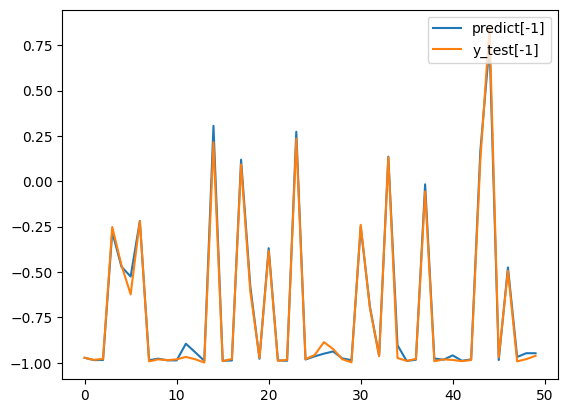

In [17]:
from Functions import mse
print(f"mse: {mse(test_predict, y_test)}, mse[-1]: {mse(test_predict[:,-1], y_test[:, -1])}")
a = 150
b = 50
plt.plot(test_predict[a:a+b,-1], label="predict[-1]")
plt.plot(y_test[a:a+b, -1], label="y_test[-1]")
plt.legend(loc='upper right')
plt.show()

In [18]:
# epoch = 20
# arch = [X.shape[2], 16, 1]
gru = RecurentNeuralNetwork(arch, RecurrentLayerTypes.GRU, seq_len , 12e-3)

In [19]:
# cProfile.run("loss_gru = gru.fit(X_train, y_train, epoch_count=epoch)", sort="cumtime")

In [20]:
loss_gru = gru.fit(X_train, y_train, epoch_count=epoch)

100%|██████████| 20/20 [02:08<00:00,  6.44s/it]


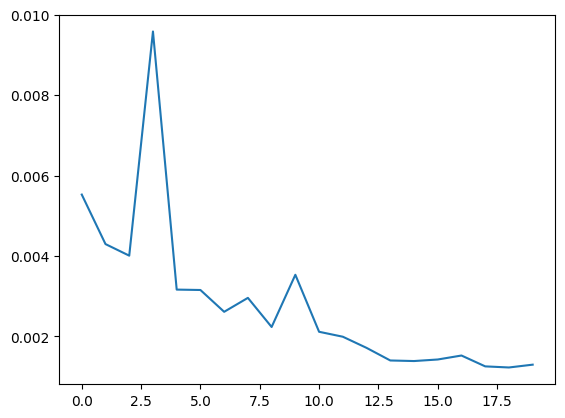

loss[-1]=0.0012960132831918844


In [21]:
plt.plot(loss_gru)
plt.show()
print(f"loss[-1]={loss_gru[-1]}")

In [22]:
test_predict_gru = gru.forward(X_test)

mse: 0.001290798931633087, mse[-1]: 0.0011753814912725548


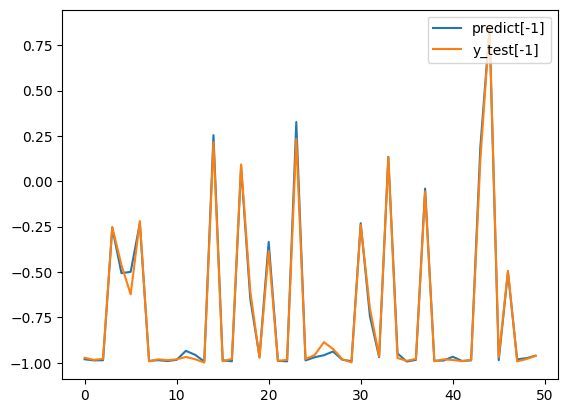

In [23]:
print(f"mse: {mse(test_predict_gru, y_test)}, mse[-1]: {mse(test_predict_gru[:,-1], y_test[:, -1])}")
a = 150
b = 50
plt.plot(test_predict_gru[a:a+b,-1], label="predict[-1]")
plt.plot(y_test[a:a+b, -1], label="y_test[-1]")
plt.legend(loc='upper right')
plt.show()

In [24]:
# epoch = 20
# arch = [X.shape[2], 16, 1]
lstm = RecurentNeuralNetwork(arch, RecurrentLayerTypes.LSTM, seq_len , 24e-3)

In [25]:
loss_lstm = lstm.fit(X_train, y_train, epoch_count=epoch)

100%|██████████| 20/20 [03:16<00:00,  9.81s/it]


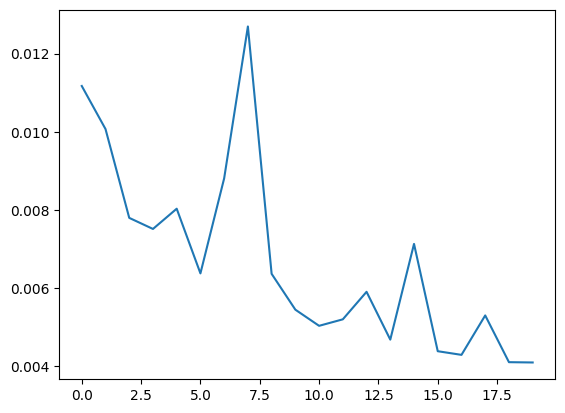

loss[-1]=0.0040953243911763275


In [26]:
plt.plot(loss_lstm)
plt.show()
print(f"loss[-1]={loss_lstm[-1]}")

In [27]:
test_predict_lstm = lstm.forward(X_test)

mse: 0.004026569409569936, mse[-1]: 0.0018770378540824114


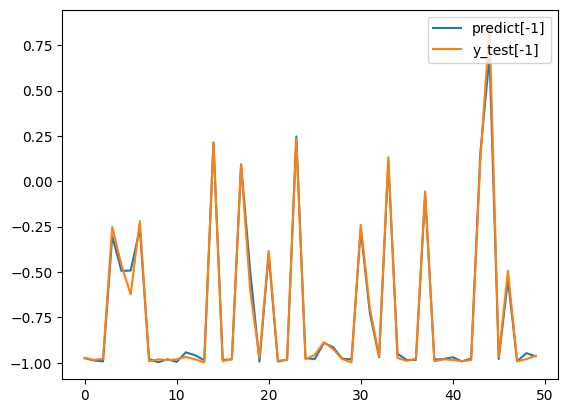

In [28]:
print(f"mse: {mse(test_predict_lstm, y_test)}, mse[-1]: {mse(test_predict_lstm[:,-1], y_test[:, -1])}")
a = 150
b = 50
plt.plot(test_predict_lstm[a:a+b,-1], label="predict[-1]")
plt.plot(y_test[a:a+b, -1], label="y_test[-1]")
plt.legend(loc='upper right')
plt.show()